In [11]:
#| hide
%load_ext autoreload
%autoreload 2
from slg_generative import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Generative

> An exploration of generative AI techniques

Looking at foundation of generative AI, starting with Variational AutoEncoders. More to come later!

## Install

```sh
pip install slg_generative
```

## How to use

Some example usage of the library

### Data

In [12]:
from slg_generative.data.datasets import FashionMnistDataset, MnistDataset
from torch.utils.data import DataLoader

ds = FashionMnistDataset(csv_file="~/Data/fashion-mnist/fashion-mnist_train.csv")
dl = DataLoader(ds, batch_size=128, shuffle=True, num_workers=0)
val_ds = FashionMnistDataset(csv_file="~/Data/fashion-mnist/fashion-mnist_test.csv")
val_dl = DataLoader(val_ds, batch_size=128, shuffle=True, num_workers=0)

ds = MnistDataset('~/Data', train=True)
dl = DataLoader(ds, batch_size=128, shuffle=True, num_workers=0)
val_ds = MnistDataset('~/Data', train=False)
val_dl = DataLoader(val_ds, batch_size=128, shuffle=True, num_workers=0)

### Model

In [13]:
import torch
device = 'mps' if torch.backends.mps.is_available() else 'cpu' # or 'cuda' for nvidia gpus

In [14]:
from slg_generative.models.vae import AutoEncoder
autoencoder = AutoEncoder().to(device)

### Training Setup

In [15]:
from torch.optim import Adam
import torch.nn as nn

opt = Adam(autoencoder.parameters(), lr=1e-3)
loss_func = nn.MSELoss()
n_epochs = 20

### Training Loop

In [7]:
from slg_generative.training import Trainer

trainer = Trainer(autoencoder, dl, val_dl, loss_func, opt, n_epochs, device)
mdl = trainer.fit()

  0%|          | 0/20 [00:00<?, ?it/s]

  5%|▌         | 1/20 [00:04<01:29,  4.72s/it]

 Validion Loss: 0.06766425752187077


 10%|█         | 2/20 [00:09<01:22,  4.58s/it]

 Validion Loss: 0.06756124843524981


 15%|█▌        | 3/20 [00:13<01:17,  4.53s/it]

 Validion Loss: 0.06757141960949838


 20%|██        | 4/20 [00:18<01:12,  4.52s/it]

 Validion Loss: 0.06759193181237087


 25%|██▌       | 5/20 [00:22<01:08,  4.54s/it]

 Validion Loss: 0.06746455909142011


 30%|███       | 6/20 [00:27<01:03,  4.52s/it]

 Validion Loss: 0.06756461892701403


 35%|███▌      | 7/20 [00:31<00:58,  4.48s/it]

 Validion Loss: 0.06758099355840985


 40%|████      | 8/20 [00:36<00:53,  4.48s/it]

 Validion Loss: 0.06759497136632099


 45%|████▌     | 9/20 [00:40<00:49,  4.47s/it]

 Validion Loss: 0.06759530107809018


 50%|█████     | 10/20 [00:45<00:44,  4.46s/it]

 Validion Loss: 0.06753240044735655


 55%|█████▌    | 11/20 [00:49<00:40,  4.45s/it]

 Validion Loss: 0.06760121089748189


 60%|██████    | 12/20 [00:53<00:35,  4.43s/it]

 Validion Loss: 0.06760474483046351


 65%|██████▌   | 13/20 [00:58<00:30,  4.41s/it]

 Validion Loss: 0.06743866775797892


 70%|███████   | 14/20 [01:02<00:26,  4.42s/it]

 Validion Loss: 0.06742701868090449


 75%|███████▌  | 15/20 [01:07<00:22,  4.43s/it]

 Validion Loss: 0.06751004285827468


 80%|████████  | 16/20 [01:11<00:17,  4.43s/it]

 Validion Loss: 0.06742691951273364


 85%|████████▌ | 17/20 [01:16<00:13,  4.48s/it]

 Validion Loss: 0.06758099143640904


 90%|█████████ | 18/20 [01:20<00:08,  4.45s/it]

 Validion Loss: 0.06749339788397656


 95%|█████████▌| 19/20 [01:24<00:04,  4.44s/it]

 Validion Loss: 0.0674778800221938


100%|██████████| 20/20 [01:29<00:00,  4.47s/it]

 Validion Loss: 0.06750410069015962


### Inference

In [21]:
PATH = "runs/20221202_141907/model_5.pt"
device = torch.device('cpu')
model = AutoEncoder()
model.load_state_dict(torch.load(PATH, map_location=device))

<All keys matched successfully>

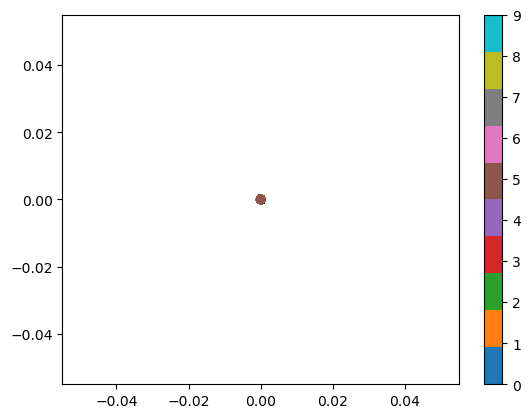

In [22]:
from slg_generative.models.vae import plot_latent2D
plot_latent2D(model.encoder, dl)